In [232]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [233]:
data = pd.read_csv('dataset/netflix_titles.csv')
df = pd.DataFrame(data)

In [234]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [235]:
print("Number of rows in the dataset:", df.shape[0])
print("Number of columns in the dataset:", df.shape[1])

Number of rows in the dataset: 8807
Number of columns in the dataset: 12


In [236]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [237]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [238]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [239]:
df.isna().sum()/len(df)*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

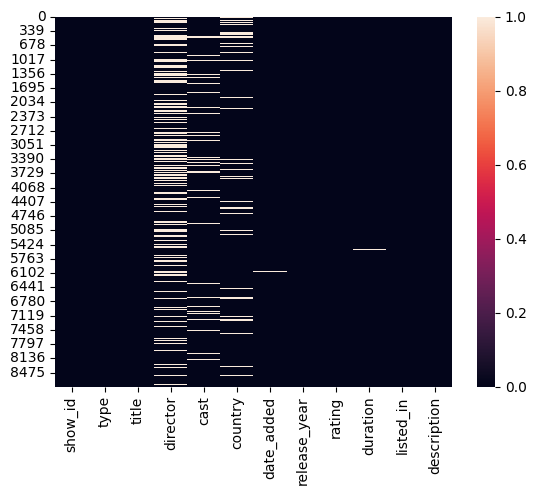

In [240]:
sns.heatmap(df.isnull())
plt.show()

In [241]:
df["type"].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [242]:
df2 = df

In [243]:
df2.dropna(subset= ["date_added", "rating", "duration"], inplace=True)

In [244]:
df2['director'].fillna('Unknown', inplace=True)
df2['cast'].fillna('Unknown', inplace=True)
df2['country'].fillna('Unknown', inplace=True)

C:\Users\axela\AppData\Local\Temp\ipykernel_26504\3599996946.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\axela\AppData\Local\Temp\ipykernel_26504\3599996946.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [245]:
df2.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [246]:
df2.duplicated().sum()

0

In [247]:
df2["show_id"].unique()

array(['s1', 's2', 's3', ..., 's8805', 's8806', 's8807'], dtype=object)

In [248]:
df2["show_id"].duplicated().sum()

0

In [249]:
fig = px.pie(df2, values=df2["type"].value_counts().values, names=df2["type"].value_counts().index)

fig.update_layout(title="Distribution of Content Type", plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='black', font=dict(color='white'))

fig.show()


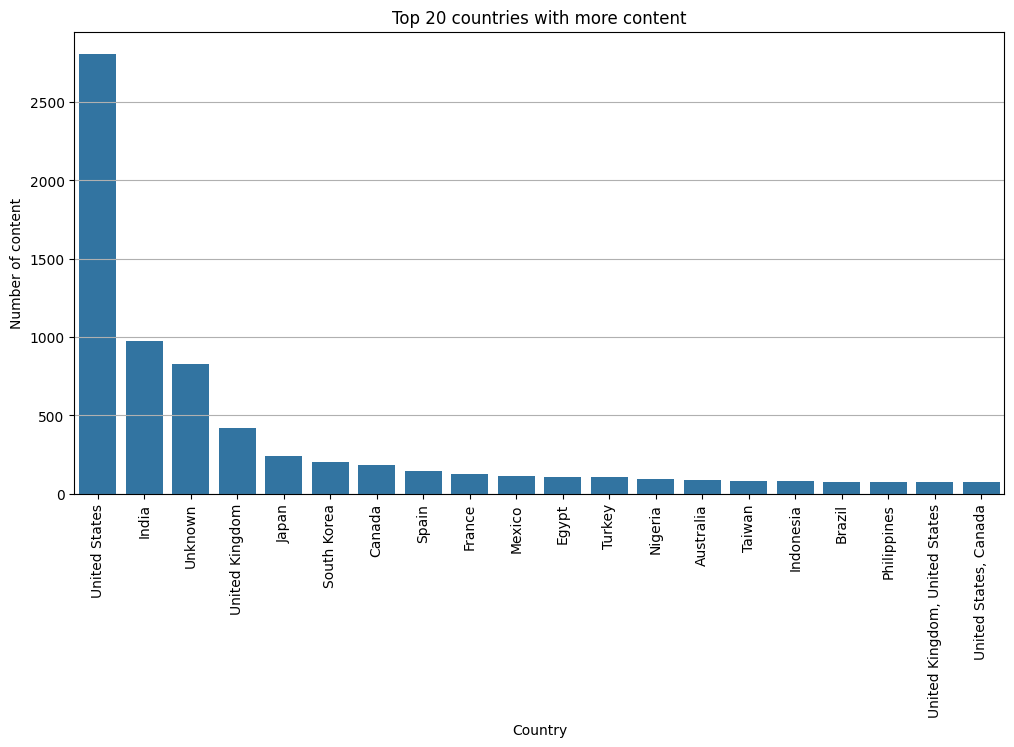

country
United States                    2809
India                             972
Unknown                           829
United Kingdom                    418
Japan                             243
South Korea                       199
Canada                            181
Spain                             145
France                            124
Mexico                            110
Egypt                             106
Turkey                            105
Nigeria                            95
Australia                          85
Taiwan                             81
Indonesia                          79
Brazil                             77
Philippines                        75
United Kingdom, United States      75
United States, Canada              73
Name: count, dtype: int64

In [250]:
top_countries = df2['country'].value_counts().head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 20 countries with more content')
plt.xlabel('Country')
plt.ylabel('Number of content')
plt.grid(True, axis='y')
plt.xticks(rotation=90)
plt.show()

top_countries

In [251]:
# Ekstraksi durasi untuk film dalam menit
df2['duration_minutes'] = df2.apply(lambda row: float(row['duration'].split()[0]) if 'min' in row['duration'] else 0, axis=1)

# Ekstraksi jumlah musim untuk acara TV
df2['duration_seasons'] = df2.apply(lambda row: float(row['duration'].split()[0]) if 'Season' in row['duration'] else 0, axis=1)

In [252]:
df2.isna().sum()

show_id             0
type                0
title               0
director            0
cast                0
country             0
date_added          0
release_year        0
rating              0
duration            0
listed_in           0
description         0
duration_minutes    0
duration_seasons    0
dtype: int64

In [253]:
movies = df2[df2['type'] == 'Movie']
movies = movies.drop(['show_id', 'type', 'director', 'cast', 'country', 'date_added', 'duration', 'duration_seasons'], axis=1)
movies

,title,release_year,rating,listed_in,description,duration_minutes
0,Dick Johnson Is Dead,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90.0
6,My Little Pony: A New Generation,2021,PG,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91.0
7,Sankofa,1993,TV-MA,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125.0
9,The Starling,2021,PG-13,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104.0
12,Je Suis Karl,2021,TV-MA,"Dramas, International Movies",After most of her family is murdered in a terr...,127.0
...,...,...,...,...,...,...
8801,Zinzana,2015,TV-MA,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,96.0
8802,Zodiac,2007,R,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158.0
8804,Zombieland,2009,R,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88.0
8805,Zoom,2006,PG,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88.0


In [254]:
tv_shows = df2[df2['type'] == 'TV Show']
tv_shows = tv_shows.drop(['show_id', 'type', 'director', 'cast', 'country', 'date_added', 'duration', 'duration_minutes'], axis=1)
tv_shows

,title,release_year,rating,listed_in,description,duration_seasons
1,Blood & Water,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0
2,Ganglands,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0
3,Jailbirds New Orleans,2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0
4,Kota Factory,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0
5,Midnight Mass,2021,TV-MA,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,1.0
...,...,...,...,...,...,...
8795,Yu-Gi-Oh! Arc-V,2015,TV-Y7,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,2.0
8796,Yunus Emre,2016,TV-PG,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",2.0
8797,Zak Storm,2016,TV-Y7,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,3.0
8800,Zindagi Gulzar Hai,2012,TV-PG,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",1.0


In [255]:
# Mengubah data dalam Unicode
mov_doc = movies['description'].values.astype('U')
# Menghapus stop words dari data deskripsi
# menggunakan vectorizer dan mengubah datatype menjadi numerical 
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(mov_doc)
features

<6126x15479 sparse matrix of type '<class 'numpy.float64'>'
	with 84334 stored elements in Compressed Sparse Row format>

In [256]:
# Membuat objek PCA dengan 10 komponen untuk memaksimalkan hasil klaster feature deskripsi
pca = PCA(n_components=10)

# Memasangkan setiap sampel features pada pca
pca.fit(features)

# Transformasi data dengan PCA
pca_data = pca.transform(features)

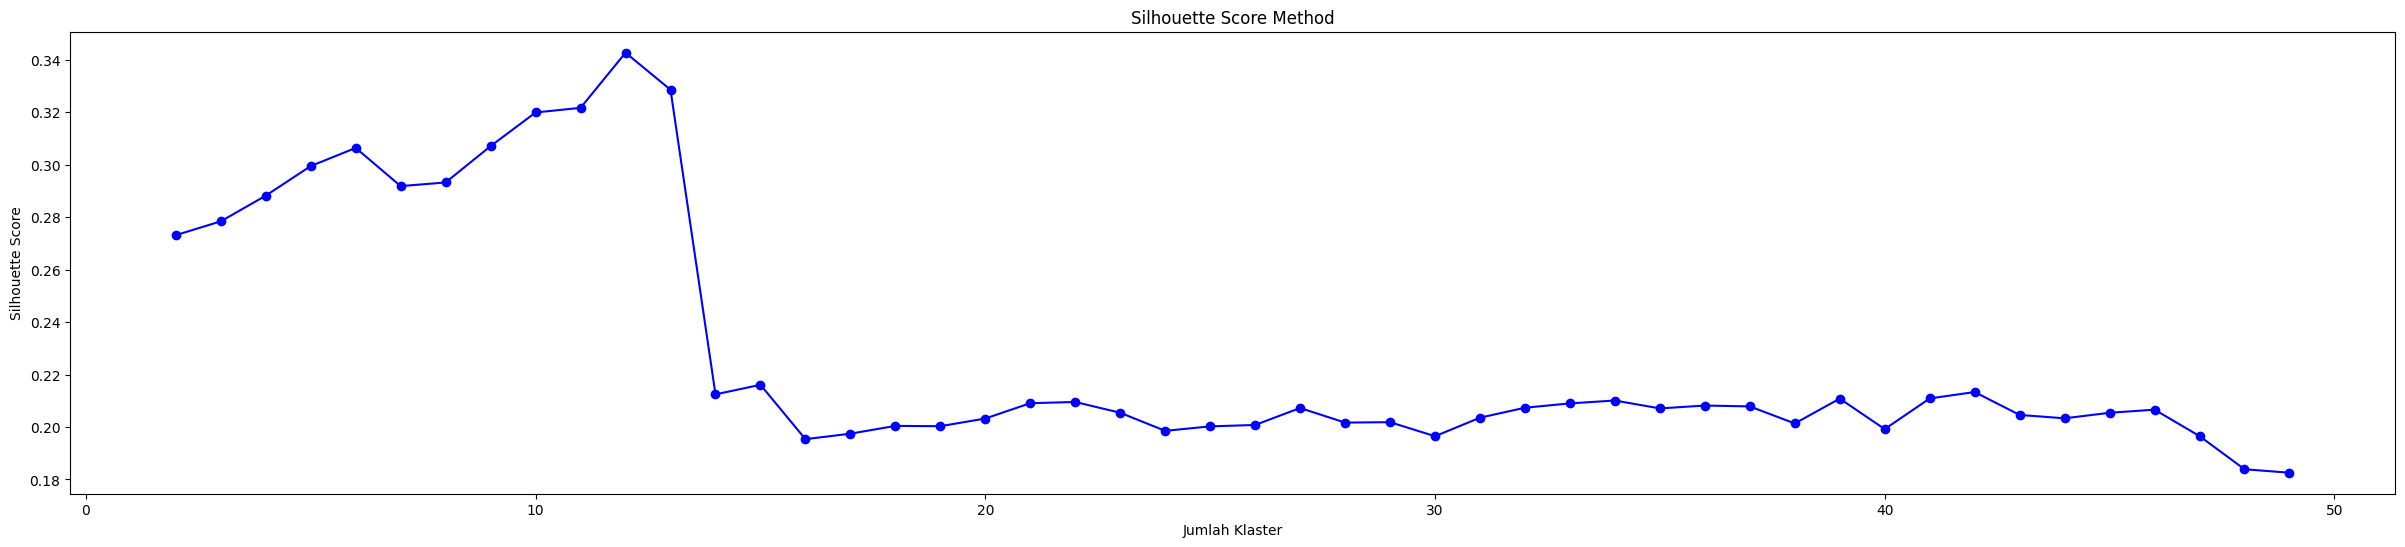

In [257]:
# Mengukur silhouette score dari data PCA untuk menemukan cluster optimal dan 
# mengecek overfitting atau kehilangan informasi
silhouette_scores = []
K1 = range(2, 50)
# Loop untuk nilai k-means di antara 2 sampai 29
for k in K1:
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Mencari k-means untuk pca_data
    kmeans.fit(pca_data)
    # Menentukan skor silhouette dari hasil k-means dan append untuk list silhouette_scores
    silhouette_scores.append(silhouette_score(pca_data, kmeans.labels_))

# Plot Silhouette Score
plt.figure(figsize=(30, 6))
plt.plot(K1, silhouette_scores, 'bo-')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()

In [258]:
optimal_k = K1[silhouette_scores.index(max(silhouette_scores))]
# Menentukan jumlah cluster teroptimal dari silhouette scores
print(f'Jumlah cluster yang optimal: {optimal_k}')
silhouette_scores[10]

Jumlah cluster yang optimal: 12


0.34270415778126145

In [259]:
# Menggunakan cluster optimal yaitu 12
k1 = 12
model = KMeans(n_clusters=k1,init='k-means++', max_iter=100, n_init=1)
model.fit(pca_data)

KMeans(max_iter=100, n_clusters=12, n_init=1)

In [260]:
movies['cluster'] = model.labels_
movies.head(20)

,title,release_year,rating,listed_in,description,duration_minutes,cluster
0,Dick Johnson Is Dead,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90.0,3
6,My Little Pony: A New Generation,2021,PG,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91.0,0
7,Sankofa,1993,TV-MA,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125.0,0
9,The Starling,2021,PG-13,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104.0,9
12,Je Suis Karl,2021,TV-MA,"Dramas, International Movies",After most of her family is murdered in a terr...,127.0,9
13,Confessions of an Invisible Girl,2021,TV-PG,"Children & Family Movies, Comedies",When the clever but socially-awkward Tetê join...,91.0,7
16,Europe's Most Dangerous Man: Otto Skorzeny in ...,2020,TV-MA,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...,67.0,3
18,Intrusion,2021,TV-14,Thrillers,After a deadly home invasion at a couple’s new...,94.0,10
22,Avvai Shanmughi,1996,TV-PG,"Comedies, International Movies",Newly divorced and denied visitation rights wi...,161.0,0
23,Go! Go! Cory Carson: Chrissy Takes the Wheel,2021,TV-Y,Children & Family Movies,From arcade games to sled days and hiccup cure...,61.0,0


In [261]:
# Drop cluster dan deskripsi 
# untuk analisa berikutnya untuk release year, rating, listed_in, dan duration minutes
movies = movies.drop('cluster', axis=1)
movies = movies.drop('description', axis=1)

In [262]:
movies.head(10)

,title,release_year,rating,listed_in,duration_minutes
0,Dick Johnson Is Dead,2020,PG-13,Documentaries,90.0
6,My Little Pony: A New Generation,2021,PG,Children & Family Movies,91.0
7,Sankofa,1993,TV-MA,"Dramas, Independent Movies, International Movies",125.0
9,The Starling,2021,PG-13,"Comedies, Dramas",104.0
12,Je Suis Karl,2021,TV-MA,"Dramas, International Movies",127.0
13,Confessions of an Invisible Girl,2021,TV-PG,"Children & Family Movies, Comedies",91.0
16,Europe's Most Dangerous Man: Otto Skorzeny in ...,2020,TV-MA,"Documentaries, International Movies",67.0
18,Intrusion,2021,TV-14,Thrillers,94.0
22,Avvai Shanmughi,1996,TV-PG,"Comedies, International Movies",161.0
23,Go! Go! Cory Carson: Chrissy Takes the Wheel,2021,TV-Y,Children & Family Movies,61.0


In [263]:
df_matrix = movies
df_matrix

,title,release_year,rating,listed_in,duration_minutes
0,Dick Johnson Is Dead,2020,PG-13,Documentaries,90.0
6,My Little Pony: A New Generation,2021,PG,Children & Family Movies,91.0
7,Sankofa,1993,TV-MA,"Dramas, Independent Movies, International Movies",125.0
9,The Starling,2021,PG-13,"Comedies, Dramas",104.0
12,Je Suis Karl,2021,TV-MA,"Dramas, International Movies",127.0
...,...,...,...,...,...
8801,Zinzana,2015,TV-MA,"Dramas, International Movies, Thrillers",96.0
8802,Zodiac,2007,R,"Cult Movies, Dramas, Thrillers",158.0
8804,Zombieland,2009,R,"Comedies, Horror Movies",88.0
8805,Zoom,2006,PG,"Children & Family Movies, Comedies",88.0


In [264]:
# Memisahkan genre dan convert menjadi numerical datatype untuk proses clustering
genres = df_matrix['listed_in'].str.get_dummies(sep=', ')
# konkatenasi genres pada df_matrix
df_matrix = pd.concat([df_matrix, genres], axis=1)
# drop features yang tidak diperlukan yaitu judul dan listed_in yang digantikan dengan feature2 genres 
df_matrix = df_matrix.drop(['title', 'listed_in'], axis=1)
df_matrix

,release_year,rating,duration_minutes,Action & Adventure,Anime Features,Children & Family Movies,Classic Movies,Comedies,Cult Movies,Documentaries,Dramas,Faith & Spirituality,Horror Movies,Independent Movies,International Movies,LGBTQ Movies,Movies,Music & Musicals,Romantic Movies,Sci-Fi & Fantasy,Sports Movies,Stand-Up Comedy,Thrillers
0,2020,PG-13,90.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2021,PG,91.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1993,TV-MA,125.0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0
9,2021,PG-13,104.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
12,2021,TV-MA,127.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,2015,TV-MA,96.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
8802,2007,R,158.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
8804,2009,R,88.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8805,2006,PG,88.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [265]:
# Mengubah datatype feature rating menjadi numerical
df_matrix['rating'] = df_matrix['rating'].astype('category').cat.codes
df_matrix

,release_year,rating,duration_minutes,Action & Adventure,Anime Features,Children & Family Movies,Classic Movies,Comedies,Cult Movies,Documentaries,Dramas,Faith & Spirituality,Horror Movies,Independent Movies,International Movies,LGBTQ Movies,Movies,Music & Musicals,Romantic Movies,Sci-Fi & Fantasy,Sports Movies,Stand-Up Comedy,Thrillers
0,2020,4,90.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2021,3,91.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1993,8,125.0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0
9,2021,4,104.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
12,2021,8,127.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,2015,8,96.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
8802,2007,5,158.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
8804,2009,5,88.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8805,2006,3,88.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [266]:
df_matrix.mean(axis=0)

release_year                2013.120144
rating                         6.643324
duration_minutes              99.584884
Action & Adventure             0.140222
Anime Features                 0.011590
Children & Family Movies       0.104636
Classic Movies                 0.018936
Comedies                       0.273262
Cult Movies                    0.011590
Documentaries                  0.141854
Dramas                         0.396017
Faith & Spirituality           0.010611
Horror Movies                  0.058276
Independent Movies             0.123408
International Movies           0.449233
LGBTQ Movies                   0.016650
Movies                         0.008652
Music & Musicals               0.061214
Romantic Movies                0.100555
Sci-Fi & Fantasy               0.039667
Sports Movies                  0.035749
Stand-Up Comedy                0.055991
Thrillers                      0.094189
dtype: float64

In [267]:
# Standarisasi data untuk mixed datatypes
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_matrix)

In [268]:
# Cek mean data standarisasi untuk keberhasilan  
scaled_df.mean(axis=0)

array([-9.53885645e-15,  1.11348519e-16, -1.43825170e-16,  2.31976081e-18,
       -4.63952162e-18,  2.78371297e-17,  3.71161729e-17,  6.95928243e-17,
       -4.63952162e-18,  2.78371297e-17,  1.43825170e-16,  4.40754554e-17,
        6.72730635e-17,  6.49533026e-17,  7.42323459e-17,  9.27904324e-18,
        1.62383257e-17,  6.95928243e-18,  6.49533026e-17, -6.03137810e-17,
       -4.63952162e-18,  3.71161729e-17,  6.14736614e-17])

In [269]:
# Membuat objek PCA dengan 10 komponen untuk mengoptimalkan cluster feature genre (listed_in),
# rating, tahun rilis, dan durasi
pca2 = PCA(n_components=10)

pca2.fit(scaled_df)

pca_data2 = pca2.transform(scaled_df)
pca_data2

array([[-1.49326916, -0.50093946,  0.1451476 , ...,  0.56931117,
        -0.28178581,  0.179054  ],
       [-1.13307491, -1.09108908, -0.33832495, ..., -0.31880138,
         1.01852177, -0.20728105],
       [ 2.04144719,  0.88692302,  0.01604763, ..., -0.974114  ,
        -0.08035135,  0.20192291],
       ...,
       [-0.24176217, -1.17619099,  1.21374013, ..., -0.15602588,
        -0.73052481, -0.12007636],
       [-0.50362847, -1.94964021, -1.45527392, ..., -0.53308839,
         0.67201743, -0.23440218],
       [ 0.79801759,  1.05326762, -0.71457878, ..., -0.86015332,
         1.68090346,  1.90927556]])

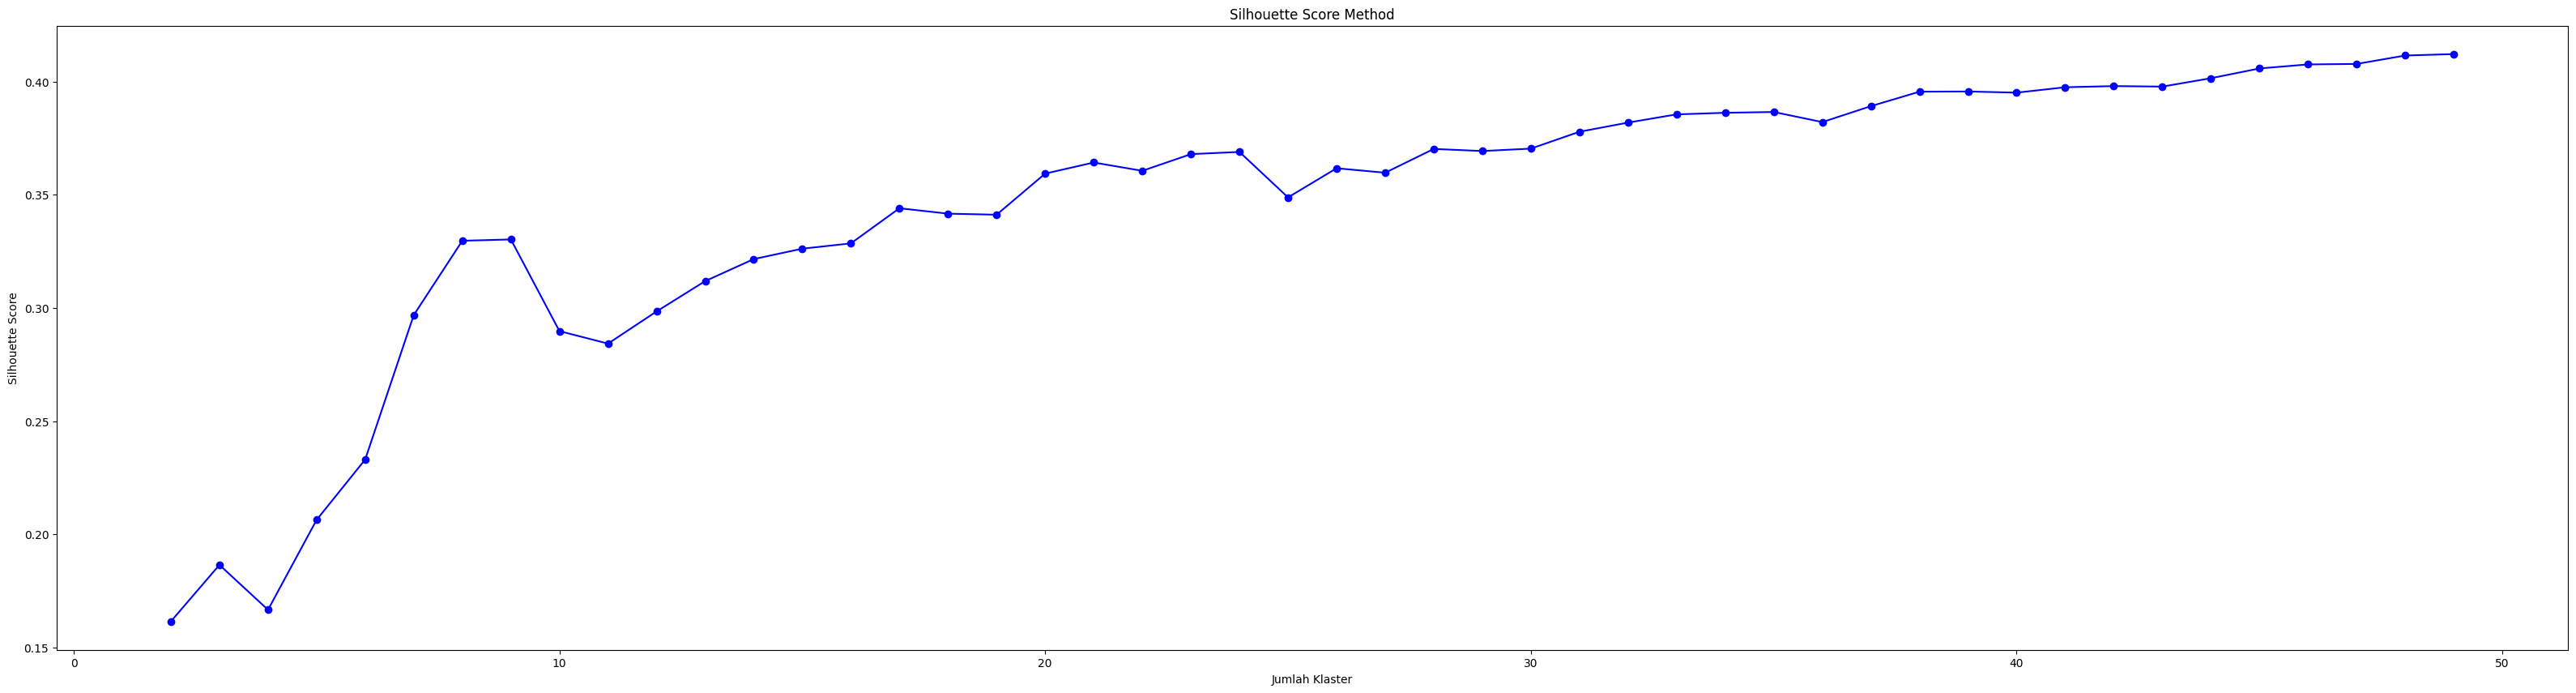

In [270]:
# Mengulang silhouette score untuk genre, rating, tahun rilis, durasi
silhouette_scores2 = []
K2 = range(2, 50)
for k in K2:
    kmeans2 = KMeans(n_clusters=k, random_state=42)
    kmeans2.fit(pca_data2)
    silhouette_scores2.append(silhouette_score(pca_data2, kmeans2.labels_))

plt.figure(figsize=(40, 10))
plt.plot(K2, silhouette_scores2, 'bo-')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()

In [271]:
# Mencari cluster optimal
optimal_k2 = K2[silhouette_scores2.index(max(silhouette_scores2))]
print(f'Optimal number of clusters: {optimal_k2}')
silhouette_scores2[47]

Optimal number of clusters: 49


0.4120966823285428

In [272]:
# Mengulang penggunaan K-Means
k2 = 49
model = KMeans(n_clusters=k2,init='k-means++', max_iter=100, n_init=1)
model.fit(pca_data2)

# Menambahkan cluster ke df_matrix
df_matrix['Cluster'] = model.labels_
df_matrix

,release_year,rating,duration_minutes,Action & Adventure,Anime Features,Children & Family Movies,Classic Movies,Comedies,Cult Movies,Documentaries,Dramas,Faith & Spirituality,Horror Movies,Independent Movies,International Movies,LGBTQ Movies,Movies,Music & Musicals,Romantic Movies,Sci-Fi & Fantasy,Sports Movies,Stand-Up Comedy,Thrillers,Cluster
0,2020,4,90.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,35
6,2021,3,91.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
7,1993,8,125.0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,28
9,2021,4,104.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,48
12,2021,8,127.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,2015,8,96.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,24
8802,2007,5,158.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,13
8804,2009,5,88.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,43
8805,2006,3,88.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6


In [273]:
# Set opsi untuk mendisplay semua kolom
pd.set_option('display.max_columns', None)
df_matrix.head(15)

,release_year,rating,duration_minutes,Action & Adventure,Anime Features,Children & Family Movies,Classic Movies,Comedies,Cult Movies,Documentaries,Dramas,Faith & Spirituality,Horror Movies,Independent Movies,International Movies,LGBTQ Movies,Movies,Music & Musicals,Romantic Movies,Sci-Fi & Fantasy,Sports Movies,Stand-Up Comedy,Thrillers,Cluster
0,2020,4,90.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,35
6,2021,3,91.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
7,1993,8,125.0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,28
9,2021,4,104.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,48
12,2021,8,127.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,10
13,2021,9,91.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,47
16,2020,8,67.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,23
18,2021,6,94.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
22,1996,9,161.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,19
23,2021,10,61.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46
